# Ridge and Lasso Regression

In [3]:
import pandas as pd
import numpy as np

### Importing the data
- data will be used from https://archive.ics.uci.edu/ml/datasets/Energy+efficiency
- The X columns represent building features and the Y column represent how the building holds heat

In [4]:
data=pd.read_csv('heating.csv')
data=data.iloc[:768,:-3]
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84


### Dividing the data into training and test sets

In [5]:
import random
target='Y1'
features=data.columns.drop(labels='Y1')
i_test=random.sample(range(0, 768),192)
i_train=[]
for i in data.index:
    if i not in i_test:
        i_train.append(i)
X_train=data.loc[i_train, features]
y_train=data.loc[i_train, target]
X_test=data.loc[i_test, features]
y_test=data.loc[i_test, target]

### Normalizing the data

In [6]:
mean=np.mean(X_train)
std=np.std(X_train)
X_train-=mean
X_train/=std
X_test-=mean
X_test/=mean

### Inserting bais term and turning data in Numpy Arrays

In [7]:
X_train.insert(0,'bias',1)
X_test.insert(0,'bias',1)
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array([y_train]).T
y_test=np.array([y_test]).T

### Cost function for Ridge Regression 
$\dfrac{1}{m}[\,\sum_{i=1}^{m}(\,y^{i}-h(\,x^{i})\,)\,^{2}+\lambda\sum_{j=1}^{n}w_{j}^{2}]\,$
### Cost function for Lasso  Regression 
$\dfrac{1}{m}[\,\sum_{i=1}^{m}(\,y^{i}-h(\,x^{i})\,)\,^{2}+\lambda\sum_{j=1}^{n}|w_{j}|]\,$
### Partial Derivatives from Features
$\delta= 2 * ((\epsilon * X_{i}) + (L2 * W_{i}))$ 
### Weight Updates
$W_{i}=W_{i-1}-(\alpha*\delta)/m$

### MSE Ridge comparision with sklearn

In [14]:
r_w=np.zeros((X_train.shape[1],1))
alpha=.1
L2=1.2
epochs=1000
for epoch in range(epochs):
    predictions=np.dot(X_train,r_w).reshape(-1,1)
    errors=predictions-y_train
    for i in range(r_w.shape[0]):
        if i ==0:
            delta=np.dot(X_train[:,i],errors)
        else:
            delta=(np.dot(X_train[:,i],errors)+L2*(r_w[i]**2))
        r_w[i]= r_w[i] - (alpha*delta)/len(y_train)  

from sklearn.linear_model import Ridge
ridge=Ridge(alpha=1.2,fit_intercept=False)
ridge.fit(X_train,y_train)
sk_r_train=ridge.predict(X_train)
sk_r_test=ridge.predict(X_test) 
mse_sk_r_train=np.sum((y_train-sk_r_train)**2)/len(X_train)
mse_sk_r_test=np.sum((y_test-sk_r_test)**2)/len(X_test)

p_r_train=np.dot(X_train,r_w)
p_r_test=np.dot(X_test,r_w)
mse_r_train=np.sum((y_train-p_r_train)**2)/len(X_train)
mse_r_test=np.sum((y_test-p_r_test)**2)/len(X_test)

print('The MSE for my Ridge on train:', np.round(mse_r_train,3))
print('The MSE for sklearn Ridge on train:', np.round(mse_sk_r_train,3))
print('The MSE for my Ridge on test:', np.round(mse_r_test,3))
print('The MSE for sklearn Ridge on test:', np.round(mse_sk_r_test,3))

The MSE for my Ridge on train: 8.87
The MSE for sklearn Ridge on train: 8.776
The MSE for my Ridge on test: 39.977
The MSE for sklearn Ridge on test: 39.829


In [18]:
l_w=np.zeros((X_train.shape[1],1))
alpha=.1
L1=1.2
epochs=1000
lasso_cost=[]
for epoch in range(epochs):
    predictions=np.dot(X_train,l_w).reshape(-1,1)
    errors=predictions-y_train
    lasso_cost.append(np.sum((errors**2)/(len(y_train))))
    for i in range(l_w.shape[0]):
        if i ==0:
            delta=np.dot(X_train[:,i],errors)
        else:
            delta=(np.dot(X_train[:,i],errors)+L1*(np.absolute(l_w[i])))
        l_w[i]= l_w[i] - (alpha*delta)/len(y_train)  
        
from sklearn.linear_model import Lasso
lasso=Ridge(alpha=1.2,fit_intercept=False)
lasso.fit(X_train,y_train)
sk_l_train=lasso.predict(X_train)
sk_l_test=lasso.predict(X_test) 
mse_sk_l_train=np.sum((y_train-sk_l_train)**2)/len(X_train)
mse_sk_l_test=np.sum((y_test-sk_l_test)**2)/len(X_test)

p_l_train=np.dot(X_train,l_w)
p_l_test=np.dot(X_test,l_w)
mse_l_train=np.sum((y_train-p_l_train)**2)/len(X_train)
mse_l_test=np.sum((y_test-p_l_test)**2)/len(X_test)

print('The MSE for my Lasso on train:', np.round(mse_l_train,3))
print('The MSE for sklearn Lasso on train:', np.round(mse_sk_l_train,3))
print('The MSE for my Lasso on test:', np.round(mse_l_test,3))
print('The MSE for sklearn Lasso on test:', np.round(mse_sk_l_test,3))

The MSE for my Lasso on train: 8.776
The MSE for sklearn Lasso on train: 8.776
The MSE for my Lasso on test: 39.532
The MSE for sklearn Lasso on test: 39.829


### Weight Comparision with sklearn

### Gradient Descent Comparisons
- For fun I put different learning rates or else the Lasso and the Ridge would be identical on the graph. 
- OLS learning rate = 1
- Ridge learning rate = .1
- Lasso learning rate = .01

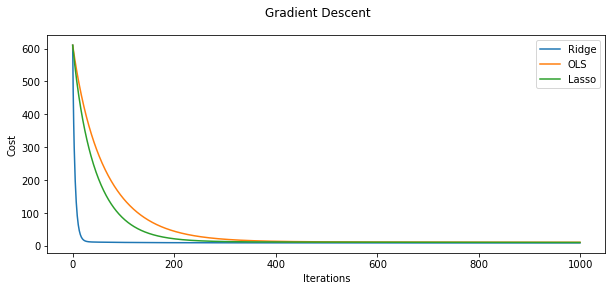

In [43]:
weights=np.zeros((X_train.shape[1],1))
alpha=4
ols_cost=[]
epochs=1000
for epoch in range(epochs):
    predictions=np.dot(X_train,weights).reshape(-1,1)
    errors=predictions-y_train
    ols_cost.append(np.sum((errors**2)/(len(y_train))))
    delta=np.dot(X_train.T,errors)/len(y_train)
    weights= weights - (alpha*delta)/len(y_train)
ridge_cost=[]
r_w=np.zeros((X_train.shape[1],1))
alpha=.1
L2=1.2
for epoch in range(epochs):
    predictions=np.dot(X_train,r_w).reshape(-1,1)
    errors=predictions-y_train
    ridge_cost.append(np.sum((errors**2)/(len(y_train))))
    for i in range(r_w.shape[0]):
        if i ==0:
            delta=np.dot(X_train[:,i],errors)
        else:
            delta=(np.dot(X_train[:,i],errors)+L2*(r_w[i]**2))
        r_w[i]= r_w[i] - (alpha*delta)/len(y_train)    
l_w=np.zeros((X_train.shape[1],1))
alpha=.01
L1=1.2
lasso_cost=[]
for epoch in range(epochs):
    predictions=np.dot(X_train,l_w).reshape(-1,1)
    errors=predictions-y_train
    lasso_cost.append(np.sum((errors**2)/(len(y_train))))
    for i in range(l_w.shape[0]):
        if i ==0:
            delta=np.dot(X_train[:,i],errors)
        else:
            delta=(np.dot(X_train[:,i],errors)+L1*(np.absolute(l_w[i])))
        l_w[i]= l_w[i] - (alpha*delta)/len(y_train)  
import matplotlib.pyplot as plt            
fig, ax = plt.subplots(figsize=(10,4))
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
fig.suptitle('Gradient Descent')
ax.plot(range(epochs),ridge_cost,label='Ridge')
ax.plot(range(epochs),ols_cost,label='OLS')
ax.plot(range(epochs),lasso_cost,label='Lasso')
ax.legend(loc='upper right')
plt.show() 

### Weight Comparision with sklearn

In [48]:
weight_table=pd.DataFrame()
weight_table['OLS']=weights.ravel()
weight_table['my Ridge']=r_w.ravel()
weight_table['sklearn Ridge']=ridge.coef_.ravel()
weight_table['my Lasso']=l_w.ravel()
weight_table['sklearn Lasso']=lasso.coef_.ravel()
weight_table

,OLS,my Ridge,sklearn Ridge,my Lasso,sklearn Lasso
0,22.469637,22.490799,22.444040,22.489828,22.444040
1,-0.295046,-8.324600,-5.118828,-0.790451,-5.118828
2,-1.091176,-4.059159,-2.276878,-1.083006,-2.276878
3,2.868539,0.124771,0.878665,2.591603,0.878665
4,-2.470625,-5.968323,-2.612107,-2.383474,-2.612107
5,4.923124,6.625148,8.589875,5.540359,8.589875
6,-0.047985,-0.057160,-0.058922,-0.050024,-0.058922
7,2.734479,2.671267,2.690593,2.728330,2.690593
8,0.379183,0.379427,0.385982,0.377249,0.385982
